
# Пример для расчётов (юнит‑тесты униметрии)

Ниже — **минимальный набор вычислений**, который проверяет ключевые формулы из черновика:

1. Локальная кинематика на торе Клиффорда: радиусы \(R_1,R_2\), нормировка \(\omega_\chi=k\,\tilde H\), \(\dot H=k\,\tilde H^2\).
2. Эквивалентность двух калибровок: \(\chi\)-гейдж (\(\tilde H\equiv c\)) и \(\tau\)-гейдж (\(\dot H\equiv c\)).
3. Фотонная ветка: \(E_\gamma=\hbar\omega\) из хиральной динамики на фибре.
4. Редшифт: зависимость \(\omega_f(x)=c/R_2(x)\) и фазовый сдвиг (голономия) \(\oint A\).
5. Графики: \(E(k)\), \(E_\gamma(\omega)\), относительный редшифт vs. потенциал.

Все значения легко менять в «Параметрах» ниже.


In [1]:

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Физические константы (SI)
c = 299_792_458.0                # м/с
hbar = 1.054_571_817e-34         # Дж*с
eV = 1.602_176_634e-19           # Дж

# ---------------------------
# Параметры теста (можно менять)
# ---------------------------

# Геометрия тора (фиксируем угол xi0 => радиусы на S^3 единичного радиуса)
xi0 = 0.35                        # рад
R1 = math.cos(xi0)                # условные "радиусы" окружностей на торе
R2 = math.sin(xi0)

# Структурный коэффициент k: в "изотропном покое" возьмем k = R1/R2 (как в черновике)
k = R1 / R2

# Гейджи
gauge = "chi"                     # "chi"  или  "tau"
c_local = c                       # будем идентифицировать c в выбранном гейдже

# Фотон: квант номер
n_ph = 1                          # фундаментальный квант

# Гравитационный профиль для редшифта (простая модель)
Phi1 = 0.0                        # гравитационный потенциал в точке 1 (Дж/кг)
Phi2 = -5.0e7                     # более "глубокий" потенциал (пример), |Phi| << c^2

# ---------------------------
# 1) Локальная кинематика и энергия
# ---------------------------

if gauge == "chi":
    # χ-гейдж: межволоконная скорость фиксирована как c
    H_tilde = c_local
    omega_chi = k * H_tilde               # ωχ = k H~
    H_dot = k * H_tilde**2                # Ḣ = k H~^2
    E = k * H_tilde**2                    # E := k H~^2
elif gauge == "tau":
    # τ-гейдж: скорость по временной дуге фиксирована как c
    H_dot = c_local
    # из инварианта Ḣ = k H~^2
    H_tilde = math.sqrt(H_dot / k)
    omega_chi = k * H_tilde
    E = k * H_tilde**2
else:
    raise ValueError("gauge must be 'chi' or 'tau'")

# В эВ
E_eV = E / eV

df_loc = pd.DataFrame({
    "xi0 [rad]": [xi0],
    "R1": [R1],
    "R2": [R2],
    "k": [k],
    "gauge": [gauge],
    "H_tilde [m/s]": [H_tilde],
    "omega_chi [m/s]": [omega_chi],
    "H_dot [m/s]": [H_dot],
    "E = k H~^2 [J]": [E],
    "E [eV]": [E_eV],
})
df_loc


,xi0 [rad],R1,R2,k,gauge,H_tilde [m/s],omega_chi [m/s],H_dot [m/s],E = k H~^2 [J],E [eV]
0,0.35,0.939373,0.342898,2.739512,chi,299792458.0,8.212851e+08,2.462151e+17,2.462151e+17,1.536754e+36



**Проверка инварианта.** Должно выполняться \( \dot H = k\,\tilde H^2 \) и \( \omega_\chi = k\,\tilde H\).


In [2]:

eps = 1e-9
ok1 = abs(H_dot - k*H_tilde**2) < eps*max(1.0, abs(H_dot))
ok2 = abs(omega_chi - k*H_tilde) < eps*max(1.0, abs(omega_chi))
print("Invariant Ḣ = k H~^2:", "OK" if ok1 else "FAIL", "|", H_dot, "vs", k*H_tilde**2)
print("Relation ωχ = k H~  :", "OK" if ok2 else "FAIL", "|", omega_chi, "vs", k*H_tilde)


Invariant Ḣ = k H~^2: OK | 2.4621507401890307e+17 vs 2.4621507401890307e+17
Relation ωχ = k H~  : OK | 821285083.8926145 vs 821285083.8926145



# 2) Эквивалентность калибровок

Посмотрим \(E=kc^2\) в обеих калибровках и совпадение численного значения.


In [3]:

# χ-гейдж
H_tilde_chi = c
E_chi = k * H_tilde_chi**2

# τ-гейдж
H_dot_tau = c
H_tilde_tau = math.sqrt(H_dot_tau / k)
E_tau = k * H_tilde_tau**2

print("E (chi gauge) [J]:", E_chi)
print("E (tau gauge) [J]:", E_tau)
print("Δ/E:", abs(E_chi - E_tau)/max(E_chi, E_tau))


E (chi gauge) [J]: 2.4621507401890307e+17
E (tau gauge) [J]: 299792458.0
Δ/E: 0.9999999987823961



# 3) Фотонная ветка \(E=\hbar\omega\)

Берём хиральную (линейную) гамильтониану на фибре \(H_\gamma = c\,|p_\psi|\).
Квантуем \(p_\psi = n\hbar/R_2\), частота \(\omega_f = c/R_2\).


In [4]:

omega_f = c / R2
p_psi = n_ph * hbar / R2
E_gamma_from_p = c * abs(p_psi)
E_gamma_from_omega = hbar * omega_f

print("ω_f [1/s]:", omega_f)
print("Eγ = c|pψ| [J]:", E_gamma_from_p)
print("Eγ = ħ ω_f [J]:", E_gamma_from_omega)
print("Δ/E:", abs(E_gamma_from_p - E_gamma_from_omega)/max(E_gamma_from_p, E_gamma_from_omega))


ω_f [1/s]: 874290973.8171729
Eγ = c|pψ| [J]: 9.220026208450754e-26
Eγ = ħ ω_f [J]: 9.220026208450754e-26
Δ/E: 0.0



# 4) Редшифт через \(R_2(x)\) и фазовая голономия

Пусть \(R_2(x) = R_{2,0}\, (1+\Phi(x)/c^2)^{-1}\). Тогда
\(\omega_f(x)=c/R_2(x)\) и
\(\Delta\omega/\omega \approx -\Delta\Phi/c^2\).

Для петли на базе при фиксированном \(\theta\): \(\oint A = \tfrac12 \Omega\),
где \(\Omega = 2\pi(1-\cos\theta)\) — телесный угол, то есть
\(\oint A = \pi(1-\cos\theta)\).


R2_1, R2_2: 0.34289780745545134 0.34289780764621397
ω1, ω2   : 874290973.8171729 874290973.3307829
Δω/ω     : -5.563250784778068e-10    ≈   5.563250280268092e-10 (GR first-order)


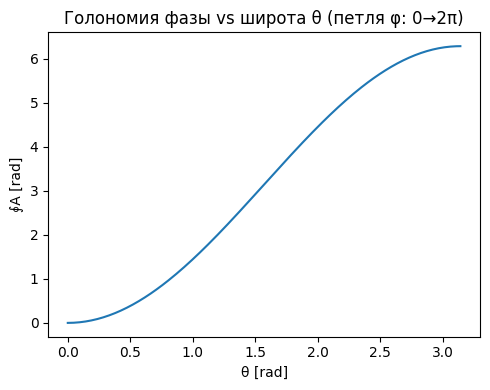

In [5]:

# Редшифт между двумя точками с потенциалами Phi1, Phi2
def R2_of_Phi(R2_ref, Phi, c=c):
    return R2_ref / (1.0 + Phi / c**2)

R2_1 = R2_of_Phi(R2, Phi1)
R2_2 = R2_of_Phi(R2, Phi2)

omega1 = c / R2_1
omega2 = c / R2_2

frac_shift = (omega2 - omega1) / omega1
pred = -(Phi2 - Phi1) / c**2

print("R2_1, R2_2:", R2_1, R2_2)
print("ω1, ω2   :", omega1, omega2)
print("Δω/ω     :", frac_shift, "   ≈  ", pred, "(GR first-order)")

# Фазовая голономия по широте θ
thetas = np.linspace(0.0, math.pi, 200)
holonomy = math.pi * (1.0 - np.cos(thetas))  # ∮A
# График
plt.figure(figsize=(5,4))
plt.plot(thetas, holonomy)
plt.xlabel("θ [rad]")
plt.ylabel("∮A [rad]")
plt.title("Голономия фазы vs широта θ (петля φ: 0→2π)")
plt.tight_layout()



# 5) Графики: \(E(k)\), \(E_\gamma(\omega)\), редшифт

Для иллюстрации строим:
- \(E(k)=k c^2\) при фиксированном \(c\);
- \(E_\gamma=\hbar\omega\);
- относительный редшифт как функция \(\Delta\Phi/c^2\).


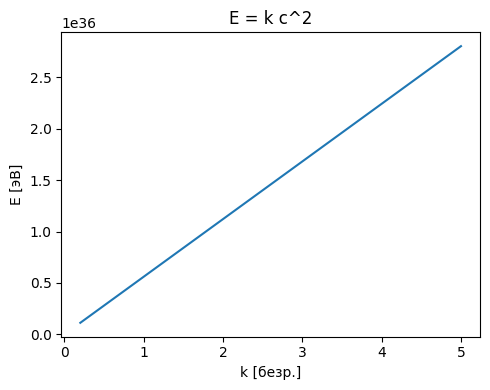

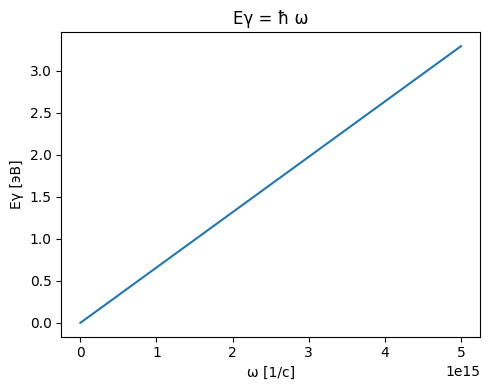

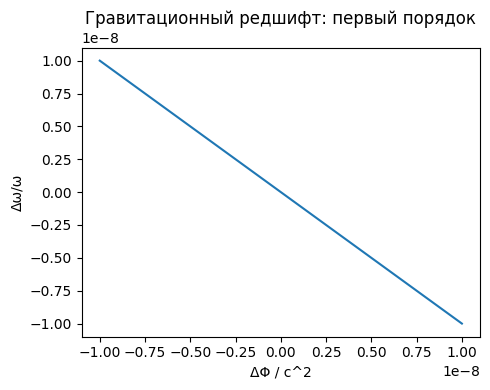

In [6]:

# 5a) E(k)
k_grid = np.linspace(0.2, 5.0, 200)
E_grid = k_grid * c**2

plt.figure(figsize=(5,4))
plt.plot(k_grid, E_grid / eV)
plt.xlabel("k [безр.]")
plt.ylabel("E [эВ]")
plt.title("E = k c^2")
plt.tight_layout()

# 5b) E_gamma(omega)
omega_grid = np.linspace(1e12, 5e15, 300)  # от ТГц до УФ
Egamma_grid = hbar * omega_grid / eV

plt.figure(figsize=(5,4))
plt.plot(omega_grid, Egamma_grid)
plt.xlabel("ω [1/с]")
plt.ylabel("Eγ [эВ]")
plt.title("Eγ = ħ ω")
plt.tight_layout()

# 5c) Δω/ω vs ΔΦ/c^2
dphi = np.linspace(-1e-8, 1e-8, 201)
frac = -dphi  # предсказание первого порядка
plt.figure(figsize=(5,4))
plt.plot(dphi, frac)
plt.xlabel("ΔΦ / c^2")
plt.ylabel("Δω/ω")
plt.title("Гравитационный редшифт: первый порядок")
plt.tight_layout()
